In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import scipy.stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/socr-mlb/baseball_players.csv


In [2]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [8, 9, 2, 4, 9, 4, 3, 3, 8, 4, 10, 0, 7, 6, 2, 4, 1, 5, 6, 10, 9, 6, 1, 0, 7, 5, 6, 1, 3, 4]
Mean = 4.9
Variance = 8.690000000000001


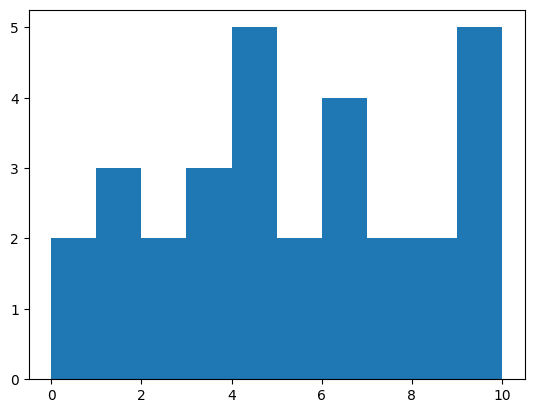

In [3]:
plt.hist(sample)
plt.show()

In [4]:
df = pd.read_csv("/kaggle/input/socr-mlb/baseball_players.csv")
df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [5]:
df[['Age','Height(inches)','Weight(pounds)']].mean()

Age                28.736712
Height(inches)     73.697292
Weight(pounds)    201.689255
dtype: float64

In [6]:
print(list(df['Height(inches)'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [7]:
mean = df['Height(inches)'].mean()
std = df['Height(inches)'].std()
var = df['Height(inches)'].var()
print(f"mean = {mean}\nStandard Deviation = {std}\nVariance = {var}")

mean = 73.6972920696325
Standard Deviation = 2.3058183105175645
Variance = 5.316798081118074


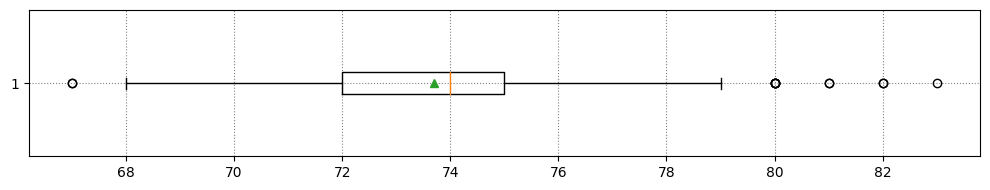

In [8]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height(inches)'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

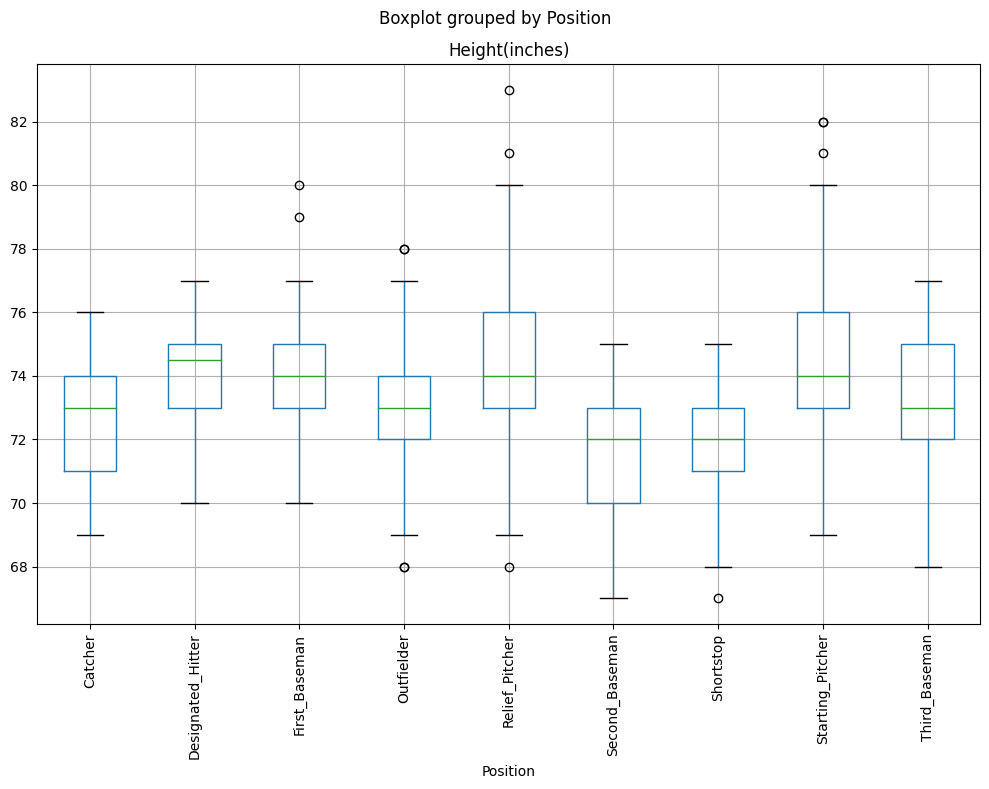

In [9]:
df.boxplot(column='Height(inches)', by='Position', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

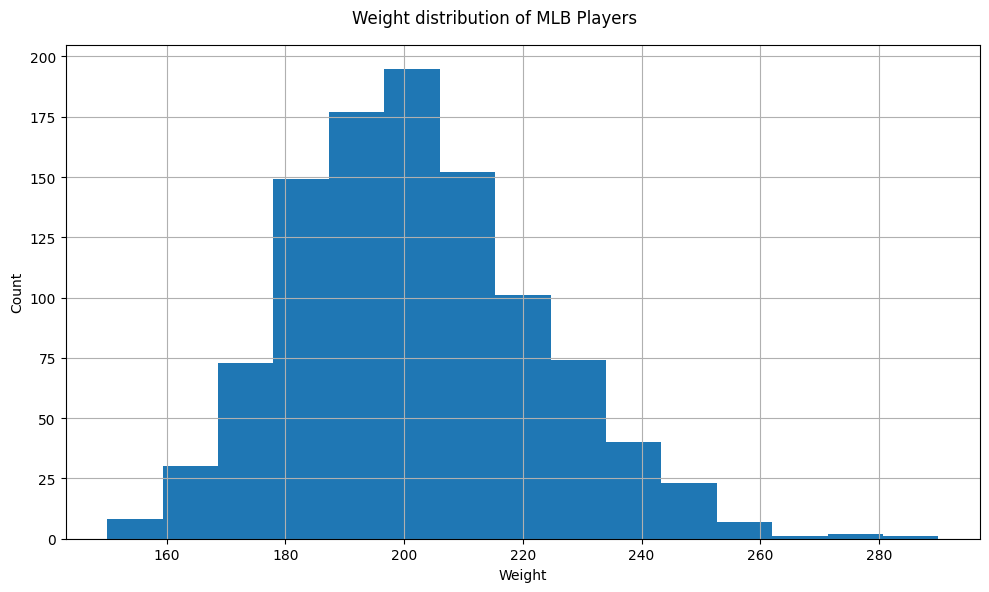

In [10]:
#Weight distribution

df['Weight(pounds)'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show() 

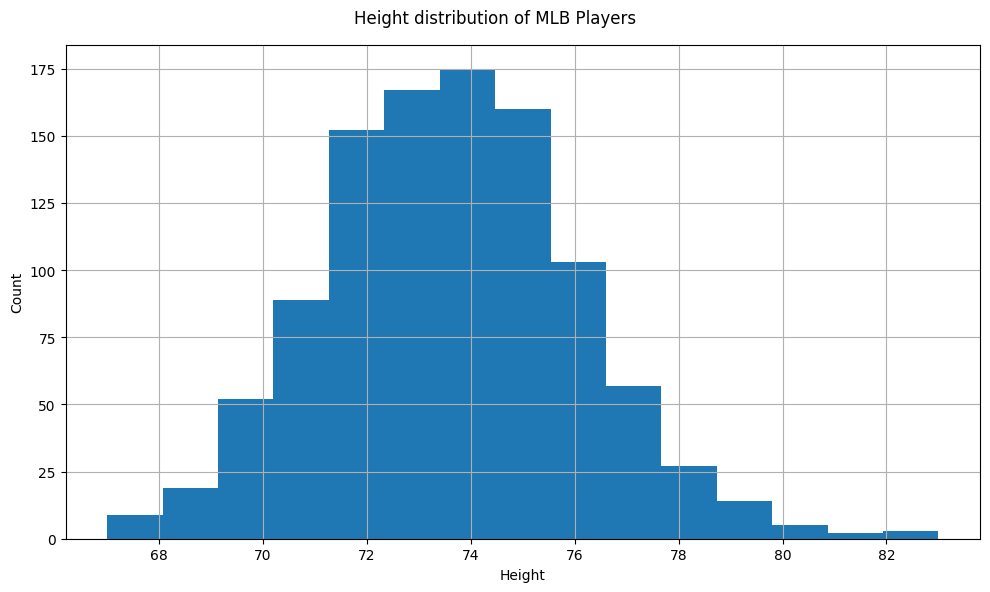

In [11]:
df['Height(inches)'].hist(bins=15, figsize=(10,6))
plt.suptitle('Height distribution of MLB Players')
plt.xlabel('Height')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

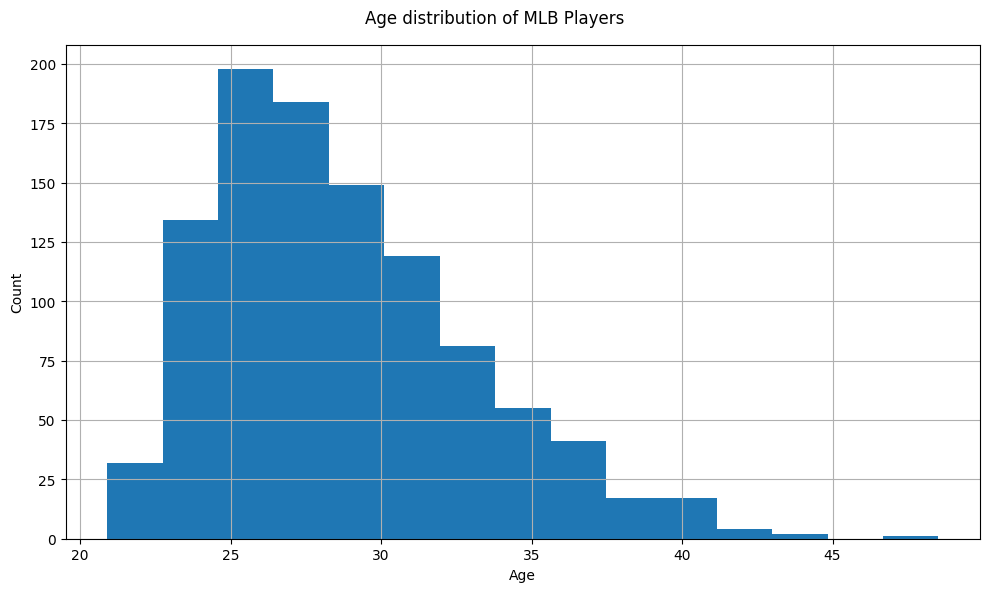

In [12]:
df['Age'].hist(bins=15, figsize=(10,6))
plt.suptitle('Age distribution of MLB Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [13]:
#Normal Distribution
#Let's create an artificial sample of weights that follows a normal distribution with the same mean and variance as our real data:

generated = np.random.normal(mean, std, 1000)
generated[:20]

array([71.12509984, 71.42786446, 73.17860854, 72.98470199, 70.18421951,
       74.01514169, 73.54494705, 71.17978493, 76.41820334, 72.49014057,
       73.00441355, 74.62543342, 70.18784872, 72.03042548, 73.89885307,
       71.89481599, 75.64249294, 75.85210069, 75.27561461, 78.42190739])

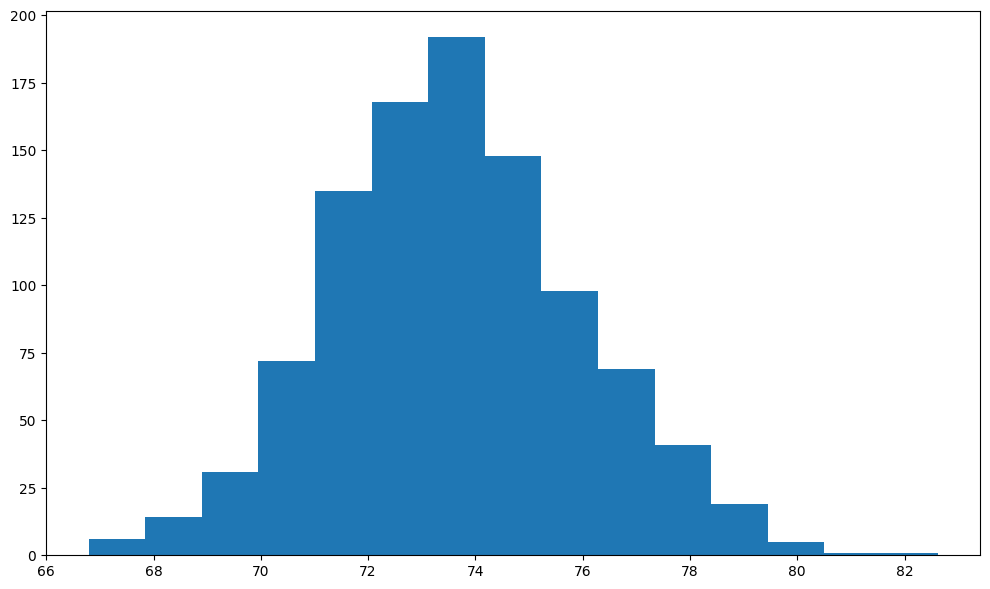

In [14]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

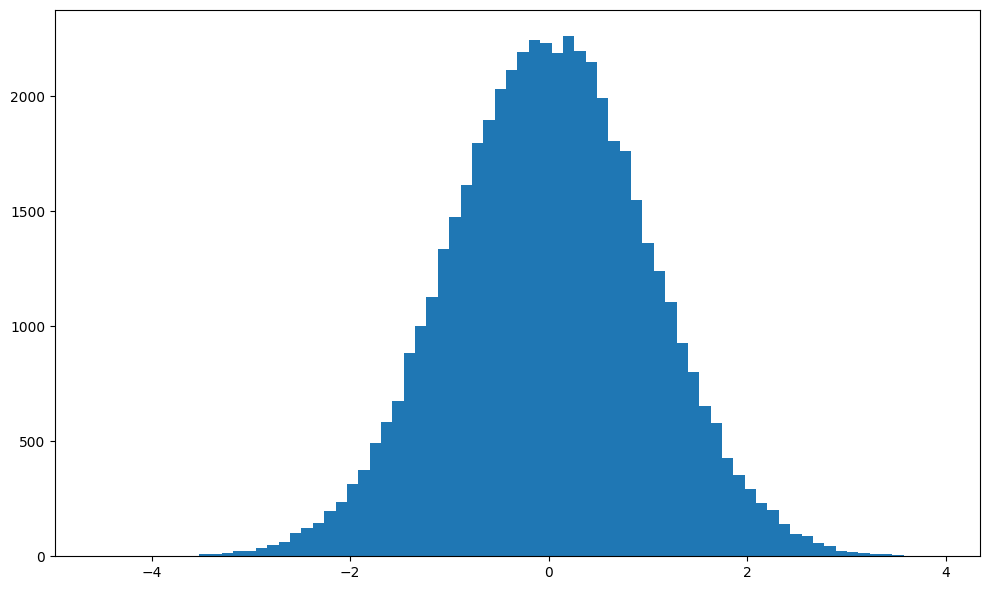

In [15]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins="rice")
plt.tight_layout()
plt.show()

In [16]:
#calculate confidence intervals for the weights and heights of baseball players



def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight(pounds)'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 201.73 ± 0.94
p=0.90, mean = 201.73 ± 1.08
p=0.95, mean = 201.73 ± 1.28


/tmp/ipykernel_18/2672694425.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  m, h = mean_confidence_interval(df['Weight(pounds)'].fillna(method='pad'),p)


In [17]:
#Hypothesis Testing

for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Position']=='First_Baseman',['Height(inches)']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Position']=='Second_Baseman',['Height(inches)']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81
